In [1]:
import csv
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
import pathlib

In [2]:
TRAINING_DIR = 'D:/Python Notebooks/Bangkit Capstone Project/Train Test Split/Training'
VALIDATION_DIR = 'D:/Python Notebooks/Bangkit Capstone Project/Train Test Split/Testing'

In [3]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=10, 
                                     zoom_range=0.1, 
                                     width_shift_range=0.1,  
                                     height_shift_range=0.1)

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=50,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  validation_datagen = ImageDataGenerator(rescale=1/255)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=50,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  
  return train_generator, validation_generator

In [4]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 57600 images belonging to 24 classes.
Found 14400 images belonging to 24 classes.


In [5]:
def create_model():

  model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                      tf.keras.layers.MaxPooling2D(2, 2),
                                      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Flatten(),                                 
                                      tf.keras.layers.Dense(256, activation='relu'),
                                      tf.keras.layers.Dropout(0.2),
                                      tf.keras.layers.Dense(24, activation='softmax')])

  model.compile(optimizer = 'adam',
                loss = 'categorical_crossentropy',
                metrics=['accuracy']) 
  
  return model

In [6]:
model = create_model()

history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

Epoch 1/10
1152/1152 [==============================] - 2681s 2s/step - loss: 1.4557 - accuracy: 0.5298 - val_loss: 0.3566 - val_accuracy: 0.8869
Epoch 2/10
1152/1152 [==============================] - 1116s 968ms/step - loss: 0.4878 - accuracy: 0.8301 - val_loss: 0.1586 - val_accuracy: 0.9501
Epoch 3/10
1152/1152 [==============================] - 1095s 950ms/step - loss: 0.3014 - accuracy: 0.8955 - val_loss: 0.0908 - val_accuracy: 0.9742
Epoch 4/10
1152/1152 [==============================] - 1096s 951ms/step - loss: 0.2226 - accuracy: 0.9230 - val_loss: 0.0402 - val_accuracy: 0.9897
Epoch 5/10
1152/1152 [==============================] - 1096s 952ms/step - loss: 0.1862 - accuracy: 0.9361 - val_loss: 0.0439 - val_accuracy: 0.9848
Epoch 6/10
1152/1152 [==============================] - 1094s 949ms/step - loss: 0.1466 - accuracy: 0.9493 - val_loss: 0.0243 - val_accuracy: 0.9926
Epoch 7/10
1152/1152 [==============================] - 1093s 949ms/step - loss: 0.1357 - accuracy: 0.9535 - 

In [7]:
model.save('D:/Python Notebooks/Bangkit Capstone Project/Saved Model/model2.h5')

In [2]:
model = tf.keras.models.load_model("D:/Python Notebooks/Bangkit Capstone Project/Saved Model/model2.h5")

In [3]:
saved_model = 'D:/Python Notebooks/Bangkit Capstone Project/Saved Model/'
tf.saved_model.save(model, saved_model)

INFO:tensorflow:Assets written to: D:/Python Notebooks/Bangkit Capstone Project/Saved Model/assets


INFO:tensorflow:Assets written to: D:/Python Notebooks/Bangkit Capstone Project/Saved Model/assets


In [4]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model)
tflite_model = converter.convert()

In [7]:
tflite_model_file = pathlib.Path('D:/Python Notebooks/Bangkit Capstone Project/Saved Model/alphabet_model.tflite')
tflite_model_file.write_bytes(tflite_model)

19272216

In [79]:
paths = []
for alphabet in classes:
    paths.append('D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/{}.jpg'.format(alphabet))
print(paths)

['D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/A.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/B.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/C.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/D.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/E.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/F.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/G.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/H.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/I.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/K.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/L.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/M.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/N.jpg', 'D:/Python 

In [83]:
paths = []
for alphabet in classes:
    paths.append("D:/Python Notebooks/Bangkit Capstone Project/archive_3/asl_alphabet_test/asl_alphabet_test/{}_test.jpg".format(alphabet))
print(paths)

['D:/Python Notebooks/Bangkit Capstone Project/archive_3/asl_alphabet_test/asl_alphabet_test/A_test.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/archive_3/asl_alphabet_test/asl_alphabet_test/B_test.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/archive_3/asl_alphabet_test/asl_alphabet_test/C_test.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/archive_3/asl_alphabet_test/asl_alphabet_test/D_test.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/archive_3/asl_alphabet_test/asl_alphabet_test/E_test.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/archive_3/asl_alphabet_test/asl_alphabet_test/F_test.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/archive_3/asl_alphabet_test/asl_alphabet_test/G_test.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/archive_3/asl_alphabet_test/asl_alphabet_test/H_test.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/archive_3/asl_alphabet_test/asl_alphabet_test/I_test.jpg', 'D:/Python Notebooks/Bangkit Capstone Project/archive_

1/1 [==============================] - 0s 30ms/step
A_test.jpg is a sign language of 'A'
1/1 [==============================] - 0s 31ms/step
B_test.jpg is a sign language of 'B'
1/1 [==============================] - 0s 33ms/step
C_test.jpg is a sign language of 'C'
1/1 [==============================] - 0s 28ms/step
D_test.jpg is a sign language of 'D'
1/1 [==============================] - 0s 29ms/step
E_test.jpg is a sign language of 'E'
1/1 [==============================] - 0s 29ms/step
F_test.jpg is a sign language of 'F'
1/1 [==============================] - 0s 24ms/step
G_test.jpg is a sign language of 'G'
1/1 [==============================] - 0s 28ms/step
H_test.jpg is a sign language of 'H'
1/1 [==============================] - 0s 27ms/step
I_test.jpg is a sign language of 'I'
1/1 [==============================] - 0s 24ms/step
K_test.jpg is a sign language of 'K'
1/1 [==============================] - 0s 26ms/step
L_test.jpg is a sign language of 'L'
1/1 [================

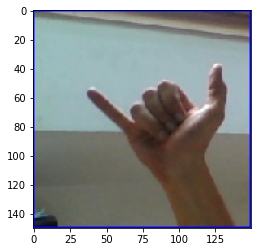

In [87]:
import numpy as np

for path in paths:
    img = tf.keras.preprocessing.image.load_img(path, target_size=(150,150))
    #img = img.rotate(270)
    x = tf.keras.preprocessing.image.img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    image_prob = model.predict(images, batch_size=10)
    index = image_prob[0].argmax(axis=-1)
    classes = ['A', 'B', 'C', 'D', 'E', 'F', 
               'G', 'H', 'I', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S',  
               'T', 'U', 'V', 'W', 'X', 'Y']
    print("{} is a sign language of '{}'".format(path[-10:], classes[index]))
    plt.imshow(img)

In [62]:
from PIL import Image
with Image.open('D:/Python Notebooks/Bangkit Capstone Project/Sign Language Testing/A.jpg') as im:
    im.rotate(270).show()